In [2]:
import pandas as pd
data=pd.read_csv("train.csv")
data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [3]:
X=data.drop(columns=['Severity','Accident_ID'])
X

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...
9995,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


In [4]:
y=data['Severity']
y.head()

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
Name: Severity, dtype: object

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
predictions=model.predict([[19.4977168949772,16,6,72.151321786691,0.388958528669311,78.32,4,37949.724386184,2,0.0696924473309929],
                          [58.1735159817352,15,3,64.5852324521422,0.250840966462315,78.6,7,30194.8055673512,2,0.00277740022017135]])
predictions

array(['Highly_Fatal_And_Damaging', 'Significant_Damage_And_Fatalities'],
      dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.878

In [8]:
from sklearn.externals import joblib
model.fit(X,y)
joblib.dump(model,'airplane.joblib')

C:\Users\Prostar Computers\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['airplane.joblib']

In [9]:
model=joblib.load('airplane.joblib')
predictions=model.predict([[33.2876712328767,15,3,64.7219690063811,0.336668589974756,86.96,6,17572.9254839105,1,0.00431639490470017]])
predictions

array(['Significant_Damage_And_Serious_Injuries'], dtype=object)

In [10]:
from sklearn import tree
tree.export_graphviz(model,out_file='airplane.dot'
                     ,feature_names=["Safety_Score","Days_Since_Inspection","Total_Safety_Complaints","Control_Metric","Turbulence_In_gforces","Cabin_Temperature","Accident_Type_Code","Max_Elevation","Violations","Adverse_Weather_Metric"]
                     ,class_names=sorted(y.unique())
                     ,label='all',rounded=True
                     ,filled=True)

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import graphviz
import os


graphviz_path = "C:\\Program Files (x86)\\Graphviz2.38\\bin"
os.environ["PATH"] += os.pathsep + graphviz_path



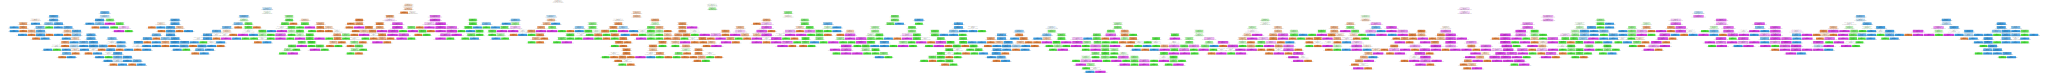

In [24]:
model = DecisionTreeClassifier()
model.fit(X,y)

dot_file = 'airplane_analysis.dot'

graph = Source(tree.export_graphviz(model, out_file=dot_file
   , feature_names=["Safety_Score","Days_Since_Inspection","Total_Safety_Complaints","Control_Metric","Turbulence_In_gforces","Cabin_Temperature","Accident_Type_Code","Max_Elevation","Violations","Adverse_Weather_Metric"], class_names=sorted(y.unique()) 
   , label='all',rounded=True,filled = True))


graphviz.Source.from_file(dot_file)

In [ ]:
## To save the outpt file from the command line, run below command.
'C:\Program Files (x86)\Graphviz2.38\bin\dot.exe'  -Tpng .\airplane_analysis.dot -o airplane.png